In [ ]:
%matplotlib inline

#from sympy import *
import numpy as np
#import sympy as sym
import scipy as sci
import scipy.integrate
#from sympy.utilities.lambdify import lambdify, implemented_function
#from sympy import sin, cos, symbols, lambdify, Matrix, Derivative, diffA
#from scipy.misc import derivative
#from scipy import integrate
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from random import seed, gauss
global influece, noInfluence, allb
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import matplotlib as mpl

G= 1


pMass = []

class Body:
    def __init__(self, mass, pos, vel):
        self.mass = mass
        self.pos = np.array(pos, dtype="float64")
        self.vel = np.array(vel, dtype="float64")

def orbitalSpeed(Rad, nBodyMass, nBodyPos):
    PosMassProd = []
    for a in range(len(nBodyMass)):
        PosMassProd.append(nBodyPos[a]*nBodyMass[a])
    return ((sum(nBodyMass))*G/Rad)**(1/2), Rad, sum(PosMassProd)

def unitTetra(r):
    #print([r*(8/9)**(1/2),0,r*-1/3],[r*-(2/9)**(1/2),r*(2/3)**(1/2),r*-1/3],[r*-(2/9)**(1/2),r*-(2/3)**(1/2),r*-1/3], [0,0,r]  )
    return [r*(8/9)**(1/2),0,r*-1/3],[r*-(2/9)**(1/2),r*(2/3)**(1/2),r*-1/3],[r*-(2/9)**(1/2),r*-(2/3)**(1/2),r*-1/3], [0,0,r]

def KE(vel):
    normVel = sci.linalg.norm(vel)
    return (0.5)*Sat.mass*normVel**2

def BodyDist(pos, nBodyMass, nBodyPos):
    qsNorm = []
    for a in range(len(nBodyMass)):
        qsNorm.append(sci.linalg.norm(nBodyPos[a] - pos))
    return qsNorm


def PE(pos, Satel, nBodyMass, nBodyPos):
    qsTotal = BodyDist(pos, nBodyMass, nBodyPos)
    peSum = 0
    for a in range(len(nBodyMass)):
        peSum = peSum - G * Satel.mass*nBodyMass[a]/qsTotal[a]
    return peSum

def bodyGen(numBody):
    nBodyTotal = []
    nBodyPos = []
    nBodyMass = []
    for a in range(0,numBody):
        nBodyTotal.append(Body(gauss(1,0.25)/(numBody), [gauss(0, .5),gauss(0, .5),gauss(0, .5)], [0,0,0]))
        nBodyPos.append(nBodyTotal[a].pos)
        nBodyMass.append(nBodyTotal[a].mass)
    return nBodyTotal, nBodyPos, nBodyMass

def satGen(SatPos, numBody):
    nBodyTotal, nBodyPos, nBodyMass = bodyGen(numBody)
    KeplerVel, radi,cmass = orbitalSpeed(SatPos[2], nBodyMass, nBodyPos)
    KeplerVel = KeplerVel/(3**(1/2))
    a = 1
    b = 1
    c = 1
    Sat = Body(1, SatPos, [KeplerVel*a,KeplerVel*b,KeplerVel*c])
    return Sat, nBodyMass, nBodyPos, nBodyTotal



def NewtonDiff(y, t):
    pos = y[:3]   #0,1,2 (x,y,z)
    vel = y[3:6]  #3,4,5 (x,y,z)
    qsTotal = []
    gauss = 0
    for a in range(len(nBodyMass)):
        qsTotal.append(sci.linalg.norm(nBodyPos[a] - pos))

    dpdt = vel*(1+gauss)
    dvdt = 0
    for a in range(len(nBodyMass)):
        dvdt = dvdt + G * (nBodyPos[a]-pos)*nBodyMass[a]/(qsTotal[a])**3
    derivs = np.concatenate((dpdt, dvdt))
    return derivs

#Xu Xd, Yu, Yd, Zu, Zd

def lyapEx(pos, vel, t_span):
    dInit = 0.001
    init_params = np.array([pos, vel])
    init_paramsArr = [np.array([[pos[0]+dInit, pos[1], pos[2]], vel]), np.array([[pos[0]-dInit, pos[1], pos[2]], vel]),
                      np.array([[pos[0], pos[1]+dInit, pos[2]], vel]), np.array([[pos[0], pos[1]-dInit, pos[2]], vel]),
                      np.array([[pos[0], pos[1], pos[2]+dInit], vel]), np.array([[pos[0], pos[1], pos[2]-dInit], vel])]
    init_params = init_params.flatten()
    for a in range(0,len(init_paramsArr)):
        init_paramsArr[a] = init_paramsArr[a].flatten()
    time_span=np.linspace(0,t_span,300000)
    mainDiff = scipy.integrate.odeint(NewtonDiff, init_params, time_span)
    mainPDiff = mainDiff[:,:3]
    mainVDiff = mainDiff[:,3:6]
    arrPDiff = []
    arrVDiff = []
    for b in range(0,len(init_paramsArr)):
        each = scipy.integrate.odeint(NewtonDiff, init_paramsArr[b], time_span)
        arrPDiff.append(each[:,:3])
        arrVDiff.append(each[:,3:6])
    return mainPDiff,mainVDiff, arrPDiff, arrVDiff

def lyapFind(mainPDiff,mainVDiff, arrPDiff, arrVDiff):
    dArr = [] #divergence array
    expArr= []
    tspan = len(mainPDiff)
    for a in range(0,len(arrPDiff)):
        lyapTraj = arrPDiff[a]
        difference = []
        for b in range(0,tspan):
            difference.append(sci.linalg.norm(mainPDiff[b] - lyapTraj[b]))
        dArr.append(difference)
    for c in range(0,len(dArr)):
        init = dArr[c][0]
        exp = []
        for t in range(1,tspan):
            val = (np.log(dArr[c][t]/init))/t
            exp.append(val)
        expArr.append(exp)
    return expArr






In [ ]:
# Body(Mass, Position (x,y,z), Velocity (x,y,z))

numBody = 10
SatPos = [0,0,1]
Sat, nBodyMass, nBodyPos, nBodyTotal = satGen(SatPos, numBody)

#print(KeplerVel)
#print(nBodyPos)
#print(nBodyMass)


In [ ]:

pos_sol, vel_sol, posArr, velArr = lyapEx(Sat.pos, Sat.vel, 10000)
lyapArr = lyapFind(pos_sol, vel_sol, posArr, velArr)

In [ ]:
%matplotlib inline
plt.hist(nBodyMass, bins=50)
print("Sum of All Bodies - ", sum(nBodyMass))
print(nBodyMass)
print(nBodyPos)

<IPython.core.display.Javascript object>

Sum of All Bodies -  1.0050788247954467
[0.09505048046430642, 0.11121312927724794, 0.11020041543429056, 0.06414160058120963, 0.08752295197255192, 0.1025321890530803, 0.11017932274845714, 0.09471269063677829, 0.09322061856567734, 0.1363054260618473]
[array([ 0.41472107, -0.25326728, -1.01387705]), array([-0.1333239 ,  0.25862871, -0.63142939]), array([-0.35305197, -0.27308341,  0.57355497]), array([-0.32955216,  0.04468208,  0.27641933]), array([-0.86236241,  0.60923768, -0.32091994]), array([ 0.47530652, -0.99933391,  0.71993721]), array([ 0.60956837, -0.44173639,  0.68970998]), array([-0.33110469, -0.45328543,  0.53700511]), array([-0.10941569,  0.19854121, -0.56624176]), array([ 0.3864439 , -0.8367372 , -0.28419044])]


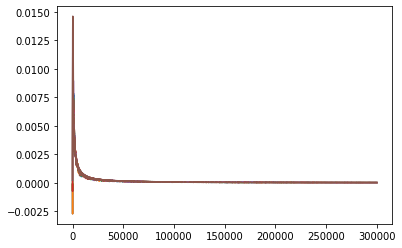

In [ ]:
%matplotlib inline
LyapPlots=plt.figure()
L = LyapPlots.add_subplot()
for a in range(0,len(lyapArr)):
    L.plot(range(0,len(lyapArr[a])), lyapArr[a])


In [ ]:
#init_params = np.array([Sat.pos, Sat.vel])
#init_params = init_params.flatten()
#Ndiff = scipy.integrate.odeint(NewtonDiff, init_params, time_span)


#pos_sol = Ndiff[:,:3]
#vel_sol = Ndiff[:,3:6]

In [ ]:
%matplotlib inline
#Create figure
fig=plt.figure(figsize=(10,10))


#Create 3D axes
ax=fig.add_subplot(111,projection="3d")


#Return the Position/Velocity Magnitudes (1D array)
tVel = []
for a in range(len(vel_sol)):
    tVel.append(sci.linalg.norm(vel_sol[a]))
tPos = []
for a in range(len(pos_sol)):
    tPos.append(sci.linalg.norm(pos_sol[a]))
tKE = []
for a in range(len(vel_sol)):
    tKE.append(KE(vel_sol[a]))
tPE = []
for a in range(len(pos_sol)):
    tPE.append(PE(pos_sol[a],Sat, nBodyMass, nBodyPos))
H = []
for a in range(len(tKE)):
    H.append(tKE[a]+tPE[a])
h_avg = (sum(H)/len(H))
y_val = []
for a in range(len(tVel)):
    y_val.append(-1*h_avg/(G*Sat.mass) + 1/(2*G*Sat.mass) * tVel[a]**2)

#Number of Observations Present in the Unit Circle
alternate = []
for a in range(len(pos_sol)):
    dist = sci.linalg.norm(pos_sol[a])
    if (dist<=1):
        alternate.append(pos_sol[a])
print("Observations in the circle: ",len(alternate))


ax.scatter(pos_sol[-1,0],pos_sol[-1,1],pos_sol[-1,2],color="darkblue",marker="o",s=100,label="Satellite")
for a in range(len(nBodyTotal)):
    ax.scatter(nBodyTotal[a].pos[0], nBodyTotal[a].pos[1], nBodyTotal[a].pos[2], marker="o",s =4)


#All Satellite Plots
ax.scatter(pos_sol[:,0],pos_sol[:,1],pos_sol[:,2],c=tVel[:], s = 5,cmap = 'viridis')
#Generating Lyapunov Trajectories
#for a in range(0,len(posArr)):
#    ax.scatter(posArr[a][:,0], posArr[a][:,1], posArr[a][:,2], c = "darkblue", s = 1)

#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of Satellite Orbits\n",fontsize=14)
#ax.legend(loc="upper left",fontsize=14)

ax.view_init(0, 90)
#ax.set_xlim(-2.5, 2.5); ax.set_ylim(-2.5, 2.5); ax.set_zlim(-2.5, 2.5);


<IPython.core.display.Javascript object>

Observations in the circle:  97076


In [ ]:
%matplotlib inline
energy=plt.figure()
E = energy.add_subplot()
time_span = range(0,300000)
E.plot(time_span, pos_sol[:,0], label = "x")
E.plot(time_span, pos_sol[:,1], label = "y")
E.plot(time_span, pos_sol[:,2], label = "z")
#E.plot(time_span, tVel)
E.plot(time_span, tKE, label = "KE")
E.legend()
E.plot(time_span, tPE)
E.plot(time_span, H)
print("H val: " + str(h_avg))

#print(pos_sol[-1,0],pos_sol[-1,1],pos_sol[-1,2])

<IPython.core.display.Javascript object>

H val: -0.6927344265688107


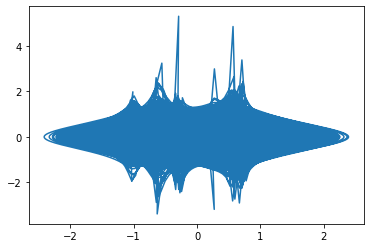

In [ ]:
%matplotlib inline
phaseMap=plt.figure()
P = phaseMap.add_subplot()
P.plot(pos_sol[:,2], vel_sol[:,2])

In [ ]:
import csv


fields = ['x', 'y', 'z', 'y-val']

rows = []
for a in range(len(y_val)):
    rows.append([pos_sol[a,0], pos_sol[a,1], pos_sol[a,2], y_val[a]])



filename = "4body-5-dumb.csv"
# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)

    # writing the fields
    csvwriter.writerow(fields)

    # writing the data rows
    csvwriter.writerows(rows)

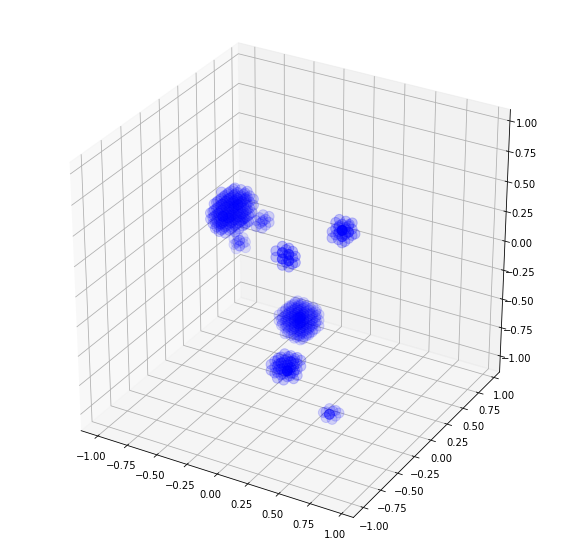

In [ ]:
%matplotlib inline

import matplotlib.colors as mcolors
colors = [(1,0,0,c) for c in np.linspace(0,1,100)]
cmapred = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=5)
colors = [(0,0,1,c) for c in np.linspace(0,1,100)]
cmapblue = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=5)

TesterPlot = []
xPoint = []
yPoint = []
zPoint = []
pePlt = []
for a in np.arange(-1,1,0.05):
    for b in np.arange(-1,1,0.05):
        for c in np.arange(-1, 1, 0.05):
            xPoint.append(a)
            yPoint.append(b)
            zPoint.append(c)
            TesterPlot.append(-1*PE([a,b,c], Sat, nBodyMass, nBodyPos))




fig2=plt.figure(figsize=(10,10))
peGraph=fig2.add_subplot(111,projection="3d")
peGraph.scatter(xPoint[:],yPoint[:],zPoint[:],c=TesterPlot[:], s = 100,cmap = cmapblue)